# Выбор локации для скважины

Необходимо принять решение, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 

Проанализовать возможную прибыль и риски техникой Bootstrap.

Шаги для выбора локации:

- В избранном регионе найдем месторождения, для каждого определим значения признаков;
- Построим модель и оценим объём запасов;
- Выбирем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [46]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import scipy.stats as stats

import matplotlib.pyplot as plt

In [47]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [48]:
# функция вывода информации о датасете
def df_info(df):
    display('Общая информация с признаками')
    display(df.head())
    display('_______________________________________________________________')
    display('Информация о типах данныx')
    display()
    display(df.info())
    display('_______________________________________________________________')
    display('Описание')
    display()
    display(df.describe())
    display('_______________________________________________________________')
    display('Пропуски')
    display()
    display(df.isna().sum())
    display('_______________________________________________________________')
    display('Дубликаты')
    display()
    display(df.duplicated().sum())
    display('_______________________________________________________________')
    display('Корреляция')
    display()
    display(df.corr()) 

In [49]:
df_info(df_0)

'Общая информация с признаками'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


'_______________________________________________________________'

'Информация о типах данныx'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'_______________________________________________________________'

'Описание'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


'_______________________________________________________________'

'Пропуски'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'_______________________________________________________________'

'Дубликаты'

0

'_______________________________________________________________'

'Корреляция'

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [50]:
df_info(df_1)

'Общая информация с признаками'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


'_______________________________________________________________'

'Информация о типах данныx'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'_______________________________________________________________'

'Описание'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


'_______________________________________________________________'

'Пропуски'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'_______________________________________________________________'

'Дубликаты'

0

'_______________________________________________________________'

'Корреляция'

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [51]:
df_info(df_2)

'Общая информация с признаками'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


'_______________________________________________________________'

'Информация о типах данныx'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'_______________________________________________________________'

'Описание'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


'_______________________________________________________________'

'Пропуски'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'_______________________________________________________________'

'Дубликаты'

0

'_______________________________________________________________'

'Корреляция'

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


In [52]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [53]:
# функция построения гистограм

def df_hist(data):
    
    data.hist(bins = 40, figsize = (18, 6))
    plt.suptitle('Распределение признаков', size = 20)

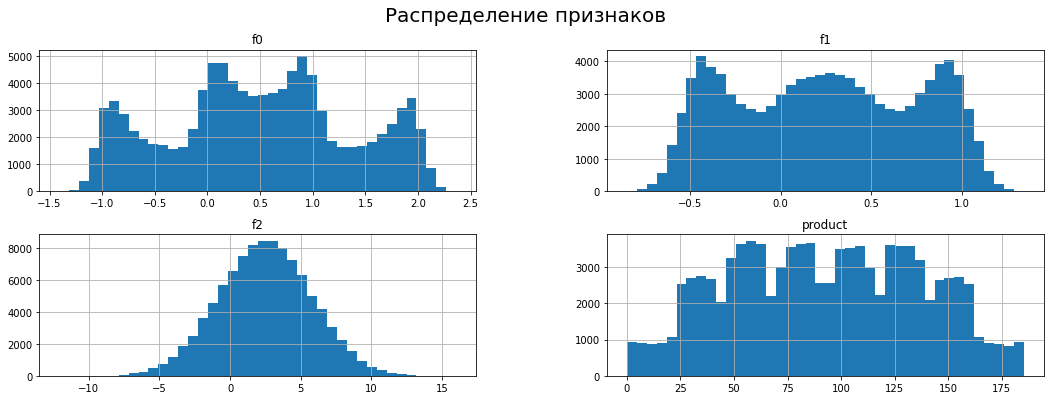

In [54]:
df_hist(df_0)

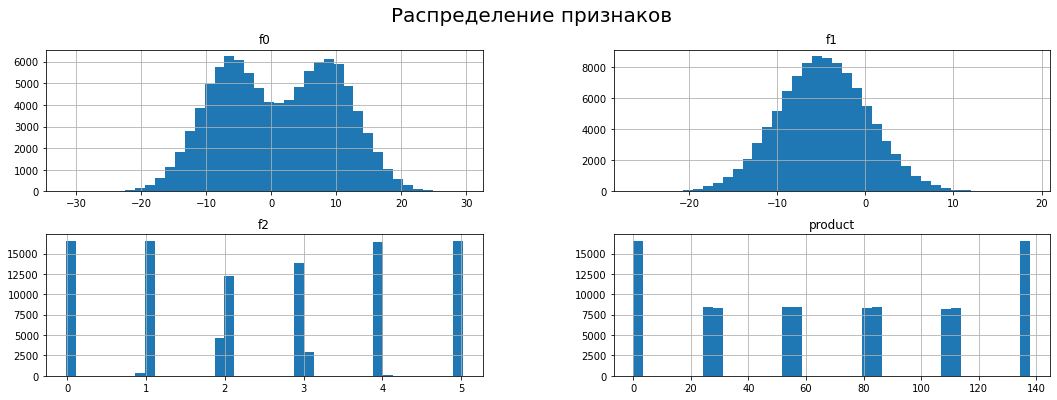

In [55]:
df_hist(df_1)

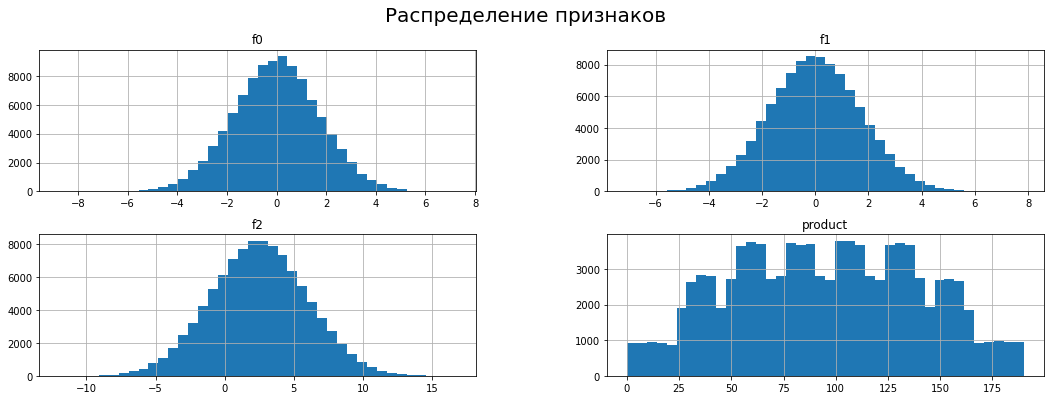

In [56]:
df_hist(df_2)

#### Удалим признак ID 

In [57]:
df_0 = df_0.drop('id', axis = 1)
df_1 = df_1.drop('id', axis = 1)
df_2 = df_2.drop('id', axis = 1)

#### Вывод:

- Данные df_0, df_1, df_2 содержат 100000 объектов и 4 признака

- Типы данных object и float64

- Количественные признаки: 'f0', 'f1', 'f2', 'product'

- Категориальный признак

- Пропуски типа NaN отсутствуют

- Полные дубликаты отсутствуют

- Высокая линейная зависимость между признаками отсутствует

- Кодировка категориальных признаков не требуется - их нет

## Обучение и проверка модели

#### Разбиение данных на обучающую и валидационную выборки в соотношении 75:25

In [58]:
STATE = np.random.RandomState(42)

x_0 = df_0.drop('product', axis = 1)
y_0 = df_0['product']

x_1 = df_1.drop('product', axis = 1)
y_1 = df_1['product'] 

x_2 = df_2.drop('product', axis = 1)
y_2 = df_2['product']

x_0_train, x_0_valid, y_0_train, y_0_valid = train_test_split(x_0, y_0, test_size=0.25, random_state=STATE)
x_1_train, x_1_valid, y_1_train, y_1_valid = train_test_split(x_1, y_1, test_size=0.25, random_state=STATE)
x_2_train, x_2_valid, y_2_train, y_2_valid = train_test_split(x_2, y_2, test_size=0.25, random_state=STATE)

### Обучение модели и предсказание на валидационной выборке.

In [59]:
model0 = LinearRegression()
model1 = LinearRegression()
model2 = LinearRegression()

model_0 = model0.fit(x_0_train, y_0_train)

model_1 = model1.fit(x_1_train, y_1_train)

model_2 = model2.fit(x_2_train, y_2_train)

predictions_valid_0 = model_0.predict(x_0_valid)

predictions_valid_1 = model_1.predict(x_1_valid)

predictions_valid_2 = model_2.predict(x_2_valid)

# вывод резыльтатов
result_0 = pd.DataFrame(y_0_valid)
result_0['predictions_valid'] = predictions_valid_0
result_0.sort_values(by=['predictions_valid'], ascending=[False], inplace=True)

result_1 = pd.DataFrame(y_1_valid)
result_1['predictions_valid'] = predictions_valid_1
result_1.sort_values(by=['predictions_valid'], ascending=[False], inplace=True)

result_2 = pd.DataFrame(y_2_valid)
result_2['predictions_valid'] = predictions_valid_2
result_2.sort_values(by=['predictions_valid'], ascending=[False], inplace=True)

display(result_0.head(5))
print('----------------------------')
display(result_1.head(5))
print('----------------------------')
display(result_2.head(5))
print('----------------------------')

,product,predictions_valid
46784,153.639837,176.536104
27658,140.631646,176.274510
6496,178.879516,173.249504
65743,176.807828,172.802708
93716,130.985681,172.744977


----------------------------


,product,predictions_valid
80439,137.945408,139.986583
33785,137.945408,139.669552
11934,137.945408,139.649735
75153,137.945408,139.509098
50134,137.945408,139.483382


----------------------------


,product,predictions_valid
98714,98.664401,174.901184
39274,166.861424,173.297752
98619,175.103291,166.457635
91268,101.014932,166.420304
70337,84.567996,166.313511


----------------------------


#### Cредний запас предсказанного сырья и RMSE модели

In [60]:
# Функция расчета среднего запаса предсказанного сырья и RMSE модели

def result_rmse(predictions_valid, y_valid):
    result_mean = predictions_valid.mean()
    rmse = mean_squared_error(y_valid,predictions_valid)**.5
    return result_mean, rmse

In [61]:
# Cредний запас предсказанного сырья

result_0_mean, rmse_0 = result_rmse(y_0_valid,predictions_valid_0)
result_1_mean, rmse_1 = result_rmse(y_1_valid,predictions_valid_1)
result_2_mean, rmse_2 = result_rmse(y_2_valid,predictions_valid_2)

print('Средний запас по участку 0: ', result_0_mean)
print('Средний запас по участку 1: ', result_1_mean)
print('Средний запас по участку 2: ', result_2_mean)

print('----------------------------')

print('RSME участку 0: ', rmse_0)
print('RSME по участку 1: ', rmse_1)
print('RSME по участку 2: ', rmse_2)

Средний запас по участку 0:  92.32595637084387
Средний запас по участку 1:  68.59968732439852
Средний запас по участку 2:  95.03521872476617
----------------------------
RSME участку 0:  37.75660035026169
RSME по участку 1:  0.8899472027156135
RSME по участку 2:  40.23735038140562


#### Вывод:

- Наименьший средний запас предсказанного сырья (68.6 тыс. баррелей) в регионе "1", регионе "0" и регионе "2" - 92.3 и 95.0 соответственно.

- Квадрат средней квадратичной ошибки у моделей для каждого региона отличается.

- Наиболее точная модель model_0 (RMSE = 38,9 тыс.бар.), далее - model_2 (RMSE = 40.2 тыс.бар.) и model_21 (RMSE = 44.9 тыс.бар.)
- В целом точность очень низкая - ошибки более 40%

## Подготовка к расчёту прибыли

In [62]:
# При разведке региона исследуют 500 точек

TOTAL_POINTS = 500

# выбирают 200 лучших точек для разработки по данным ML

BEST_TOTAL_POINTS = 200

# Бюджет на разработку скважин в регионе

TOTAL_BUDGET = 10000000000

# Бюджет на разработку одной выбранной скважины в регионе

POINT_BUDGET = TOTAL_BUDGET / BEST_TOTAL_POINTS

# одна тысяча баррелей сырья приносит доход
PROFIT_BARR = 450000

# Нижний квантиль

LOWER = 0.025

# Верхний квантиль

UPPER = 0.975


### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [63]:
value_point_min = POINT_BUDGET / PROFIT_BARR
value_point_min

111.11111111111111

#### Разница среднего запаса в регионе и достаточного объём сырья

In [64]:
print('Разница среднего запаса в регионе 0 и достаточного объём сырья', result_0_mean - value_point_min)
print('Разница среднего запаса в регионе 1 и достаточного объём сырья', result_1_mean - value_point_min)
print('Разница среднего запаса в регионе 2 и достаточного объём сырья', result_2_mean - value_point_min)

Разница среднего запаса в регионе 0 и достаточного объём сырья -18.785154740267245
Разница среднего запаса в регионе 1 и достаточного объём сырья -42.5114237867126
Разница среднего запаса в регионе 2 и достаточного объём сырья -16.075892386344947


#### Вывод:

- Средняя скважина во всех регионах будет убыточной.

## Расчёт прибыли и рисков 

#### Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [65]:
def revenue(target, probabilities, count):    
   
    probs_sorted = probabilities.sort_values(ascending=False) 
    selected = target[probs_sorted.index][:count]
    return selected.sum() * PROFIT_BARR - TOTAL_BUDGET

In [66]:
def total_info(target, probabilities, count):
            
    values = [] 
    target = target.reset_index(drop=True)
    
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=STATE)
        probs_subsample = pd.Series(probabilities)[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, count))
        
    values = pd.Series(values)
            
    print('Средняя прибыль: {:_.2f}'. format(pd.Series(values).mean()))
    print("2.5%-квантиль:  {:_.2f}". format(values.quantile(LOWER)))
    print("97.5%-квантиль: {:_.2f}". format(values.quantile(UPPER)))
    print("Риск убытков: {:.4} %". format(stats.percentileofscore(values, 0)))

In [67]:
print('Расчёт прибыли и рисков по региону 0: ')
total_info(y_0_valid, predictions_valid_0, BEST_TOTAL_POINTS)
print('-------------------------')

print('Расчёт прибыли и рисков по региону 1: ')
total_info(y_1_valid, predictions_valid_1, BEST_TOTAL_POINTS)
print('-------------------------')

print('Расчёт прибыли и рисков по региону 2: ')
total_info(y_2_valid, predictions_valid_2, BEST_TOTAL_POINTS)
print('-------------------------')

Расчёт прибыли и рисков по региону 0: 
Средняя прибыль: 440_446_619.54
2.5%-квантиль:  -129_698_263.88
97.5%-квантиль: 980_351_534.78
Риск убытков: 5.8 %
-------------------------
Расчёт прибыли и рисков по региону 1: 
Средняя прибыль: 489_036_146.09
2.5%-квантиль:  63_878_578.77
97.5%-квантиль: 900_130_455.53
Риск убытков: 1.0 %
-------------------------
Расчёт прибыли и рисков по региону 2: 
Средняя прибыль: 343_559_871.28
2.5%-квантиль:  -210_907_750.68
97.5%-квантиль: 884_771_214.58
Риск убытков: 11.9 %
-------------------------


#### Вывод:

Модель определения наиболее прибыльного региона и анализ рисков, на основании представленных к анализу данных о регионах показали следующее:

- Наибольшую среднюю прибыль имеет регион "1" 489_036_146.09 баррелей нефти

- Наименьшая вероятность быть убыточным менее 1.0% - регион "1"

- Регион "1" выбран, как регион выполнивший условие - риск убытков менее 2.5% и рекомендован к разработке.